In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/test/assignment1.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!ls
!ls /content/drive/'My Drive'/test

#!ls ../bin

#!ls /tmp
#!ls /tmp/dataset
#!ls /tmp/dataset/train

drive  sample_data
 assignment1.zip		     b.ipynb
'assignment1.zip (Unzipped Files)'   kau_binary_classification.ipynb
 assignment2.zip		     KAU_intro_deep_learning.ipynb
'assignment2.zip (Unzipped Files)'   test.ipynb


In [ ]:
base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training plane pictures
train_planes_dir = os.path.join(train_dir, 'planes')

# Directory with our training no plane pictures
train_no_planes_dir = os.path.join(train_dir, 'no_planes')

# Directory with our test plane pictures
test_planes_dir = os.path.join(test_dir, 'planes')

# Directory with our test no plane pictures
test_no_planes_dir = os.path.join(test_dir, 'no_planes')
print(train_dir)

/tmp/dataset/train


In [ ]:
train_plane_fnames = os.listdir(train_planes_dir)
print(train_plane_fnames[:10])

train_no_plane_fnames = os.listdir(train_no_planes_dir)
train_no_plane_fnames.sort()
print(train_no_plane_fnames[:10])

['0422687.jpg', '1412287.jpg', '0547020.jpg', '0917341.jpg', '0227131.jpg', '1767275.jpg', '1302926.jpg', '1555715.jpg', '1539352.jpg', '0979659.jpg']
['BACKGROUND_Google_image_0008.jpg', 'BACKGROUND_Google_image_0010.jpg', 'BACKGROUND_Google_image_0015.jpg', 'BACKGROUND_Google_image_0020.jpg', 'BACKGROUND_Google_image_0034.jpg', 'BACKGROUND_Google_image_0036.jpg', 'BACKGROUND_Google_image_0058.jpg', 'BACKGROUND_Google_image_0060.jpg', 'BACKGROUND_Google_image_0065.jpg', 'BACKGROUND_Google_image_0085.jpg']


In [ ]:
print('total training planes images:', len(os.listdir(train_planes_dir)))
print('total training no_planes images:', len(os.listdir(train_no_planes_dir)))
print('total test planes images:', len(os.listdir(test_planes_dir)))
print('total test no_planes images:', len(os.listdir(test_no_planes_dir)))

total training planes images: 1000
total training no_planes images: 1000
total test planes images: 500
total test no_planes images: 500


Now let's take a look at a few pictures to get a better sense of what the planes and no_planes datasets look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 plane and 8 no_plane pictures. You can rerun the cell to see a fresh batch each time:

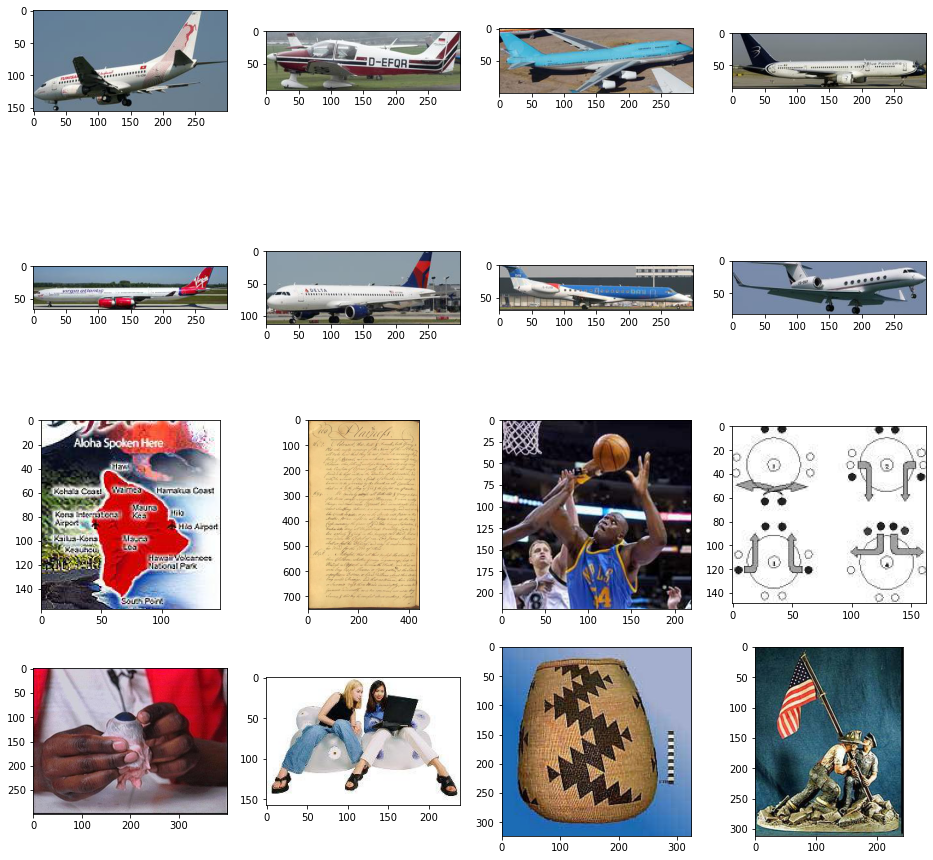

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_plane_pix = [os.path.join(train_planes_dir, fname) 
                for fname in train_plane_fnames[pic_index-8:pic_index]]
next_no_plane_pix = [os.path.join(train_no_planes_dir, fname) 
                for fname in train_no_plane_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_plane_pix+next_no_plane_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  #if i==0:
  #  print(img)

  plt.imshow(img)

plt.show()


Building a Small Convnet from Scratch!

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))
  
# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 4s - loss: 0.5622 - acc: 0.7760 - val_loss: 0.2333 - val_acc: 0.9060
Epoch 2/15
100/100 - 4s - loss: 0.2550 - acc: 0.8990 - val_loss: 0.1890 - val_acc: 0.9320
Epoch 3/15
100/100 - 4s - loss: 0.1813 - acc: 0.9345 - val_loss: 0.1596 - val_acc: 0.9390
Epoch 4/15
100/100 - 4s - loss: 0.1409 - acc: 0.9510 - val_loss: 0.1641 - val_acc: 0.9390
Epoch 5/15
100/100 - 4s - loss: 0.0935 - acc: 0.9655 - val_loss: 0.1743 - val_acc: 0.9470
Epoch 6/15
100/100 - 4s - loss: 0.0686 - acc: 0.9765 - val_loss: 0.1807 - val_acc: 0.9260
Epoch 7/15
100/100 - 4s - loss: 0.0475 - acc: 0.9835 - val_loss: 0.2284 - val_acc: 0.9360
Epoch 8/15
100/100 - 4s - loss: 0.0292 - acc: 0.9860 - val_loss: 0.2520 - val_acc: 0.9400
Epoch 9/15
100/100 - 4s - loss: 0.0411 - acc: 0.9885 - val_loss: 0.2922 - val_acc: 0.9340
Epoch 10/15
100/100 - 4s - los

Data Preprocessing
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


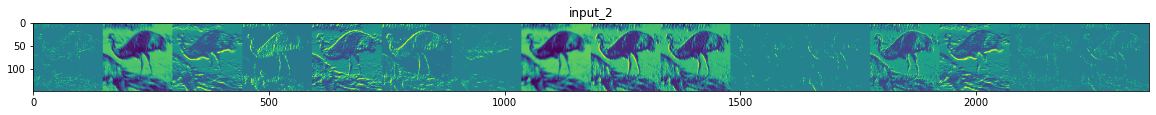

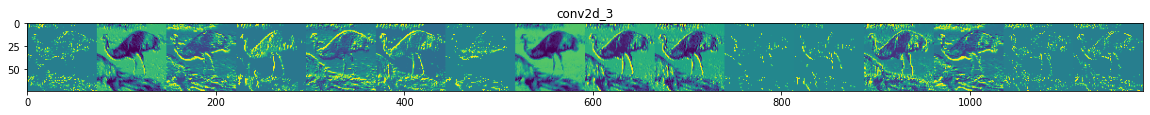

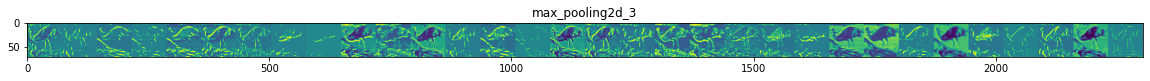

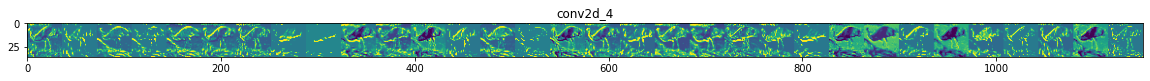

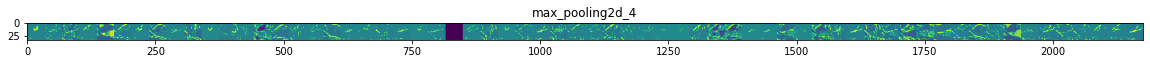

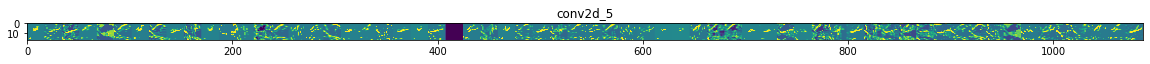

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a plane or no_plane from the training set.
plane_img_files = [os.path.join(train_planes_dir, f) for f in train_plane_fnames]
no_plane_img_files = [os.path.join(train_no_planes_dir, f) for f in train_no_plane_fnames]
img_path = random.choice(plane_img_files + no_plane_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

Evaluating Accuracy and Loss for the Model
Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

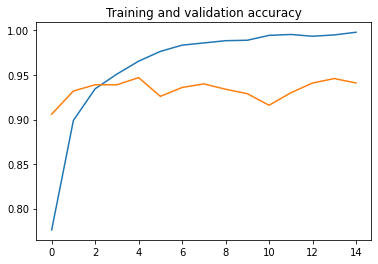

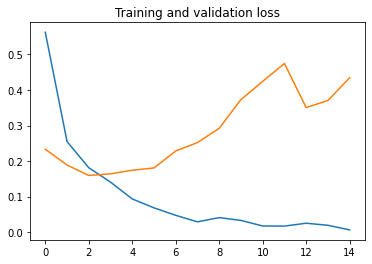

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')